# XGBoost

__Gradient Tree Boosting__ or __Gradient Boosted Regression Trees__ works in a stagewise fashion. Each subsequent model is trained on the errors of previous model. This process is repeated iteratively.

 - Type: Boosting + Regularization 
 - Objective: $\mathcal{L}^{(t)} = \sum_i l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t)$ $\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum w_j^2$



In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [75]:
# Create a dataset
from sklearn.model_selection import train_test_split

n = 200
np.random.seed(42)
X = np.random.uniform(-200, 200, n)
y = 3*X**2 + 0.05 * np.random.randn(n)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [76]:
from sklearn.tree import DecisionTreeRegressor

# Manual implementation of Gradient Boosting
tree_reg = []
learning_rate = 0.1
n_estimators = 101
residual = y_train.copy()
residual = residual.reshape(-1)

# Training
for i in range(n_estimators):
    reg = DecisionTreeRegressor(max_depth=10, random_state=42)
    reg.fit(X_train, residual)
    y_pred = reg.predict(X_train)
    residual -= learning_rate * y_pred
    tree_reg.append(reg)

In [77]:
# Prediction is sum of all trees
y_pred = sum(learning_rate * t.predict(X_test) for t in tree_reg)

In [82]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:,.2f}, MAE: {mae:,.2f}")

MSE: 1,003,982.59, MAE: 719.52


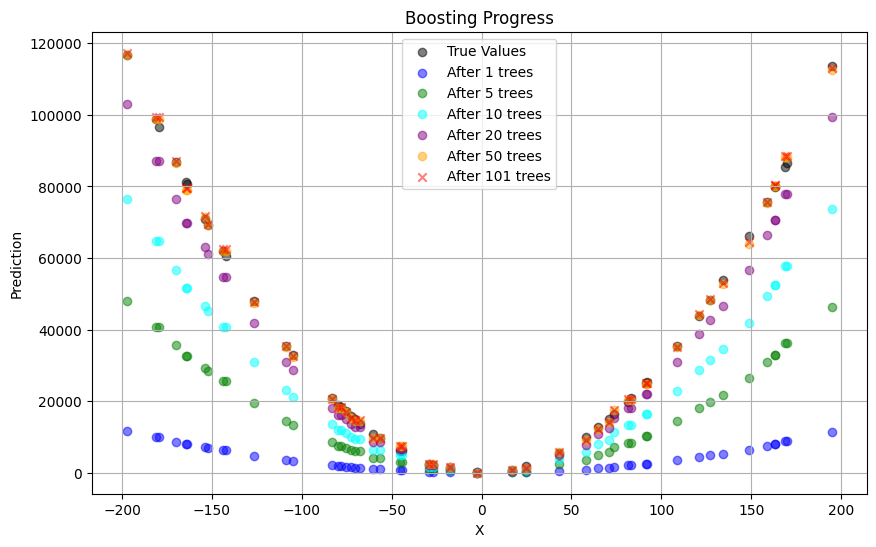

In [83]:
import matplotlib.pyplot as plt

# Initialize cumulative prediction
cumulative_pred = np.zeros_like(y_test)

# Plot true values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black", label="True Values", alpha=0.5)

# Scatter plot of predictions after every 20th tree
colors = ["blue", "green", "aqua", "purple", "orange"]
col = 0
for i in [1, 5, 10, 20, 50]:
    tree = tree_reg[i]
    cumulative_pred = sum(learning_rate * t.predict(X_test) for t in tree_reg[:i])
    plt.scatter(X_test, cumulative_pred, color=colors[col], label=f"After {i} trees", alpha=0.5)
    col += 1
# Scatter plot of final prediction
plt.scatter(X_test, y_pred, color="red",
            label="After 101 trees", marker="x", alpha=0.5)
plt.title("Boosting Progress")
plt.xlabel("X")
plt.ylabel("Prediction")
plt.legend()
plt.grid(True)
plt.show()

## GradientBoostingRegressor

We can implement an equivalent `GradientBoostingRegressor()` as follows. The `learning_rate=1.0` as we directly subtracted residuals. The error rates will be equal.

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=10,
    n_estimators=101,
    learning_rate=.1,
    random_state=42)
gbrt.fit(X_train, y_train.reshape(-1))
y_pred = gbrt.predict(X_test)

In [81]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:,.2f}, MAE: {mae:,.2f}")

MSE: 1,003,982.59, MAE: 719.52


## XGBoost

Is a different python library that tunes to be scalable, fast and portable. 